In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import multiprocessing
import os
from functools import partial

from multi_imu.cf    import CF
from multi_imu.ekf   import EKF
from multi_imu.plot  import *
from multi_imu.sim   import sim_run
from multi_imu.stats import evaluate_ekfs

In [3]:
num_sims  = 50
time_max  = 100
bump_time = 50

pool = multiprocessing.Pool(multiprocessing.cpu_count() - 1)
# mp_output = pool.map(partial(sim_run, time_max = time_max), range(num_sims))
mp_output = pool.map(partial(sim_run, time_max = time_max, bump_time = bump_time), range(num_sims))

ekfs = [tup[0] for tup in mp_output]
cfs  = [tup[1] for tup in mp_output]

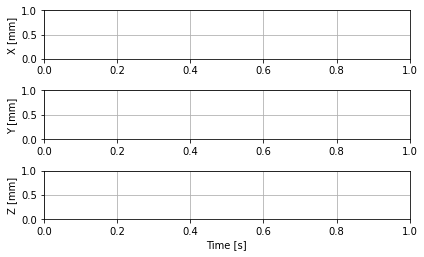

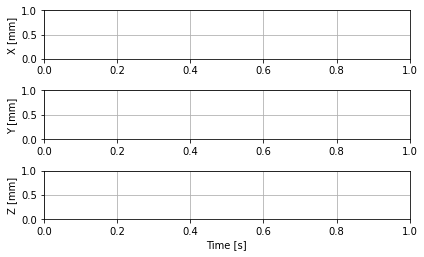

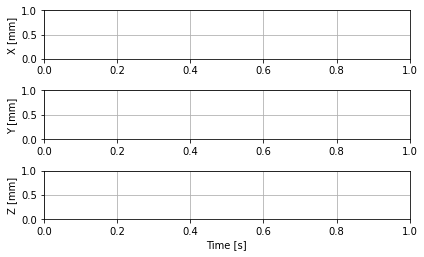

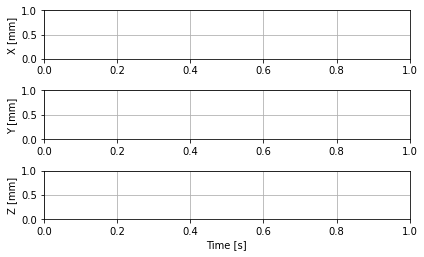

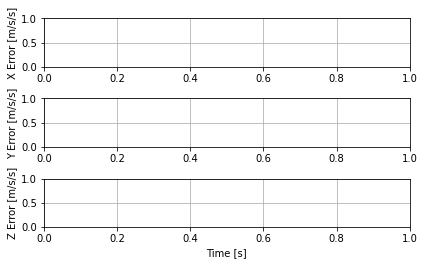

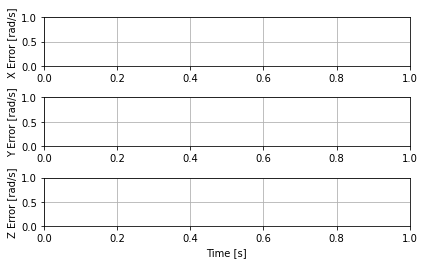

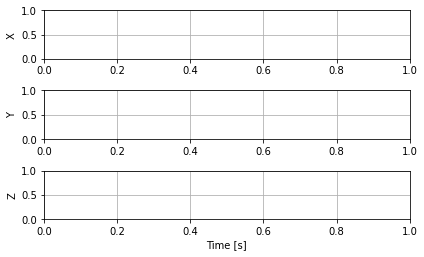

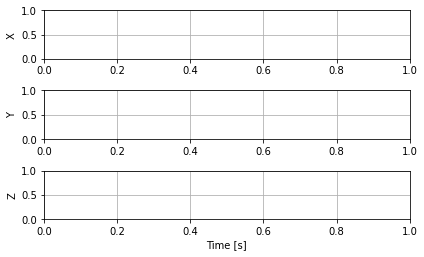

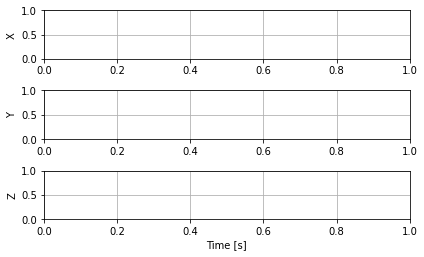

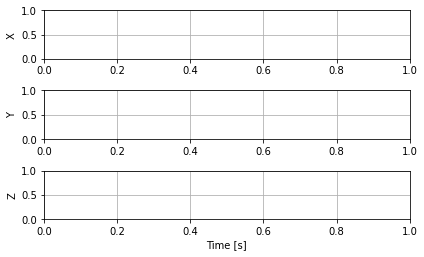

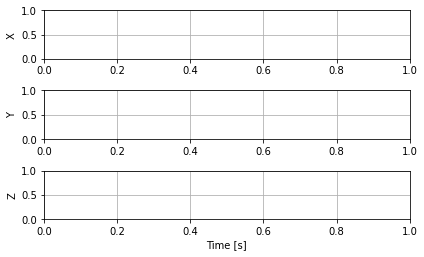

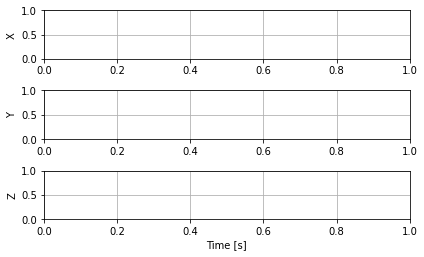

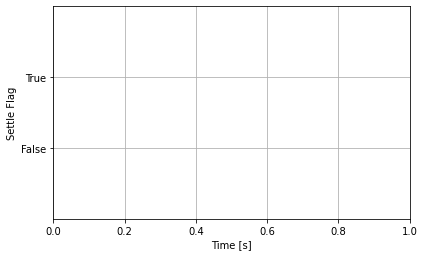

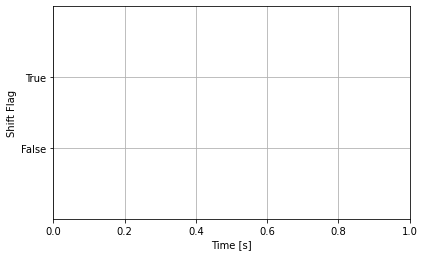

In [4]:
# plot_ekf_state_history(ekfs[0])
# plot_ekf_cov_history(ekfs[0])
plot_mc_states(ekfs)
plot_mc_residuals(ekfs)
plot_mc_tests(ekfs)
plot_mc_flags(ekfs)

In [5]:
evaluate_ekfs(ekfs, cfs)